In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12

In [7]:
PCAWG_timing = pd.read_csv("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001.csv")
SCANB_timing = pd.read_csv("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/SCANB_unfiltered_Breast_WGD_HRD_TimingResults_v9_timing_nboot200.csv")
INFORM_timing = pd.read_csv("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/INFORM_germline_filtered_Breast_WGD_HRD_TimingResults_v9_timing_nboot200.csv")

PCAWG_timing["cohort"] = "PCAWG"
SCANB_timing["cohort"] = "SCANB"
INFORM_timing["cohort"] = "INFORM"
# Combine Breast cohorts
Breast_cohorts = pd.concat([PCAWG_timing, SCANB_timing, INFORM_timing])
# Ovary cohort
PCAWG_ovary = pd.read_csv("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/PCAWG_Ovary_WGD_HRD_TimingResults_v9_timing_nboot200.csv")


In [15]:
q1_breast = np.percentile(Breast_cohorts["HRDTime"], 25)
q3_breast = np.percentile(Breast_cohorts["HRDTime"], 75)
hrdtime_mean_breast = Breast_cohorts["HRDTime"].median()

mean_rounded = float(f"{hrdtime_mean_breast:.2g}")
q1_rounded = float(f"{q1_breast:.2g}")
q3_rounded = float(f"{q3_breast:.2g}")

print("Breast_cohorts HRDTime median:", mean_rounded)
print("Breast_cohorts HRDTime IQR:", (q1_rounded, q3_rounded))

Breast_cohorts HRDTime median: 0.38
Breast_cohorts HRDTime IQR: (0.2, 0.46)


In [16]:
q1_ovary = np.percentile(PCAWG_ovary["HRDTime"], 25)
q3_ovary = np.percentile(PCAWG_ovary["HRDTime"], 75)
hrdtime_mean_ovary = PCAWG_ovary["HRDTime"].median()

mean_rounded = float(f"{hrdtime_mean_ovary:.2g}")
q1_rounded = float(f"{q1_ovary:.2g}")
q3_rounded = float(f"{q3_ovary:.2g}")

print("Ovary_cohorts HRDTime mean:", mean_rounded)
print("Ovary_cohorts HRDTime IQR:", (q1_rounded, q3_rounded))

Ovary_cohorts HRDTime mean: 0.3
Ovary_cohorts HRDTime IQR: (0.22, 0.45)


In [17]:
PCAWG_timing['HRDTime'].median()

0.3792764722720544

In [18]:
SCANB_timing['HRDTime'].median()

0.3817405330286986

In [19]:
INFORM_timing['HRDTime'].median()

0.1321254488668825

/var/folders/s2/3xsty6pj6cv1cjtsw14mt7fr0000gn/T/ipykernel_50421/2009627297.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='TimeType', y='Time', ax=ax, palette='Set2',width=0.5, fliersize=2, legend=False,
/var/folders/s2/3xsty6pj6cv1cjtsw14mt7fr0000gn/T/ipykernel_50421/2009627297.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='TimeType', y='Time', ax=ax, palette='Set2',width=0.5, fliersize=2, legend=False,


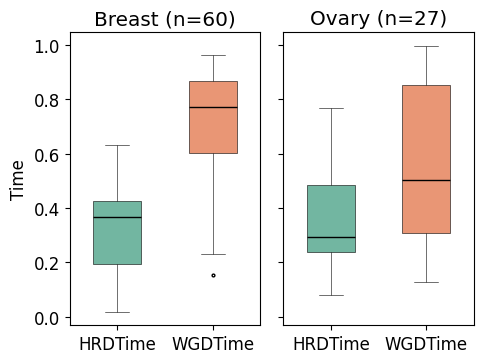

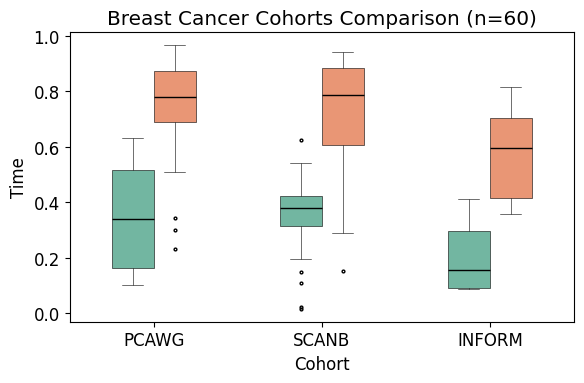

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
files = {
    'PCAWG_Breast': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv",
    'PCAWG_Ovary': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Ovary_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv",
    'SCANB_Breast': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'INFORM_Breast': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv",
}

# Excluded samples
samples_to_exclude = set([
    'PD31145a', 'PD35929a', 'PD36006a', 'PD35926a', 'PD35935a', 'PD36067a', 'PD35990a',
    'PD31129a', 'PD31155a', 'PD35941a', 'PD36024a', 'PD31044a', 'PD31171a', 'PD31178a',
    'PD36054a', 'PD31056a', 
    '7456abd5-303e-4e6f-bf4e-47efefc7310f', 'fc806c50-2f6e-418d-e040-11ac0d485f01',
    '5dbf3203-ce73-41e4-bf9a-32fc856f73f5', '418e916b-7a4e-4fab-8616-15dcec4d79f8',
    'f393bb07-270c-2c93-e040-11ac0d484533', 'b752b444-f033-4be4-9d24-e5e80b4181af',
    '207f8a42-5b05-4876-b0ae-ebfaeea27844', 'd5372745-95cf-4572-a6e7-e7f5b796911a',
    'f393bb0c-4178-ca4a-e040-11ac0d48455f', '987528ac-437a-4eb8-a335-4f2076d5c006',
    'fc8130df-8ec8-5b1e-e040-11ac0d485e06', 'fca6150f-d555-a29e-e040-11ac0d4873b2',
    '43f7a2e0-fec9-4e43-872d-18c6c946fa17', 'Patient33', 'Patient101'
])

# Load and combine data
all_data = []
for name, path in files.items():
    df = pd.read_csv(path)
    df = df[~df['ID'].isin(samples_to_exclude)].copy()
    df['Cohort'] = name
    all_data.append(df)

combined = pd.concat(all_data, ignore_index=True)

# Split into Breast and Ovary
combined['Cancer'] = combined['Cohort'].apply(lambda x: 'Breast' if 'Breast' in x else 'Ovary')
combined['Source'] = combined['Cohort'].apply(lambda x: x.replace('_Breast', '').replace('_Ovary', ''))

# --- Plot 1: Breast vs Ovary (HRD and WGD boxplots) ---
fig, axes = plt.subplots(1, 2, figsize=(5, 4), sharey=True)
for ax, cancer in zip(axes, ['Breast', 'Ovary']):
    subset = combined[combined['Cancer'] == cancer]
    plot_df = pd.melt(subset, id_vars='ID', value_vars=['HRDTime', 'WGDTime'], var_name='TimeType', value_name='Time')
    sns.boxplot(data=plot_df, x='TimeType', y='Time', ax=ax, palette='Set2',width=0.5, fliersize=2, legend=False,
                boxprops=dict(edgecolor='black', linewidth=0.4),
                whiskerprops=dict(color='black', linewidth=0.4),
                capprops=dict(color='black', linewidth=0.4),
                medianprops=dict(color='black'),
                flierprops=dict(markeredgecolor='black', linewidth=0.5))
    ax.set_title(f'{cancer} (n={subset["ID"].nunique()})')
    ax.set_xlabel('')
    ax.set_ylabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Plot 2: Breast cancer cohorts (PCAWG, SCANB, INFORM) ---
breast = combined[combined['Cancer'] == 'Breast'].copy()
breast = pd.melt(breast, id_vars=['ID', 'Cohort'], value_vars=['HRDTime', 'WGDTime'],
                 var_name='TimeType', value_name='Time')
breast['Cohort'] = breast['Cohort'].str.replace('_Breast', '', regex=False)


plt.figure(figsize=(6, 4))
sns.boxplot(data=breast, x='Cohort', y='Time', hue='TimeType', palette='Set2',width=0.5, fliersize=2, legend=False,
                boxprops=dict(edgecolor='black', linewidth=0.4),
                whiskerprops=dict(color='black', linewidth=0.4),
                capprops=dict(color='black', linewidth=0.4),
                medianprops=dict(color='black'),
                flierprops=dict(markeredgecolor='black', linewidth=0.5))
plt.title(f'Breast Cancer Cohorts Comparison (n={breast["ID"].nunique()})')
plt.ylabel('Time')
plt.xlabel('Cohort')
plt.tight_layout()
plt.show()


/var/folders/s2/3xsty6pj6cv1cjtsw14mt7fr0000gn/T/ipykernel_50421/726760763.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='TimeType', y='Time', ax=ax, legend=False,palette=color_map, width=0.5, fliersize=2,
/var/folders/s2/3xsty6pj6cv1cjtsw14mt7fr0000gn/T/ipykernel_50421/726760763.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='TimeType', y='Time', ax=ax, legend=False,palette=color_map, width=0.5, fliersize=2,


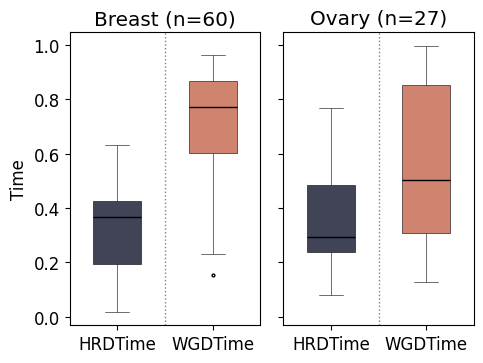

/var/folders/s2/3xsty6pj6cv1cjtsw14mt7fr0000gn/T/ipykernel_50421/726760763.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


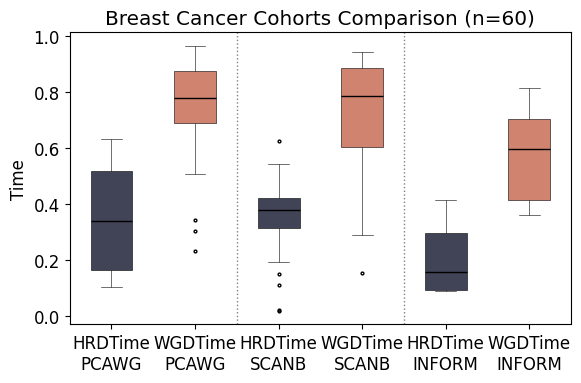

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
files = {
    'PCAWG_Breast': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv",
    'PCAWG_Ovary': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Ovary_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv",
    'SCANB_Breast': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'INFORM_Breast': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv",
}

# Excluded samples
samples_to_exclude = set([
    'PD31145a', 'PD35929a', 'PD36006a', 'PD35926a', 'PD35935a', 'PD36067a', 'PD35990a',
    'PD31129a', 'PD31155a', 'PD35941a', 'PD36024a', 'PD31044a', 'PD31171a', 'PD31178a',
    'PD36054a', 'PD31056a', 
    '7456abd5-303e-4e6f-bf4e-47efefc7310f', 'fc806c50-2f6e-418d-e040-11ac0d485f01',
    '5dbf3203-ce73-41e4-bf9a-32fc856f73f5', '418e916b-7a4e-4fab-8616-15dcec4d79f8',
    'f393bb07-270c-2c93-e040-11ac0d484533', 'b752b444-f033-4be4-9d24-e5e80b4181af',
    '207f8a42-5b05-4876-b0ae-ebfaeea27844', 'd5372745-95cf-4572-a6e7-e7f5b796911a',
    'f393bb0c-4178-ca4a-e040-11ac0d48455f', '987528ac-437a-4eb8-a335-4f2076d5c006',
    'fc8130df-8ec8-5b1e-e040-11ac0d485e06', 'fca6150f-d555-a29e-e040-11ac0d4873b2',
    '43f7a2e0-fec9-4e43-872d-18c6c946fa17', 'Patient33', 'Patient101'
])

# Load and combine data
all_data = []
for name, path in files.items():
    df = pd.read_csv(path)
    df = df[~df['ID'].isin(samples_to_exclude)].copy()
    df['Cohort'] = name
    all_data.append(df)

combined = pd.concat(all_data, ignore_index=True)

# Add tissue type and source label
combined['Cancer'] = combined['Cohort'].apply(lambda x: 'Breast' if 'Breast' in x else 'Ovary')
combined['Source'] = combined['Cohort'].apply(lambda x: x.replace('_Breast', '').replace('_Ovary', ''))

# Set color palette
color_map = {'HRDTime': '#3d405b', 'WGDTime': '#e07a5f'}

# --- Plot 1: Breast vs Ovary (HRD and WGD boxplots) ---
fig, axes = plt.subplots(1, 2, figsize=(5, 4), sharey=True)

for ax, cancer in zip(axes, ['Breast', 'Ovary']):
    subset = combined[combined['Cancer'] == cancer]
    plot_df = pd.melt(subset, id_vars='ID', value_vars=['HRDTime', 'WGDTime'],
                      var_name='TimeType', value_name='Time')
    
    sns.boxplot(data=plot_df, x='TimeType', y='Time', ax=ax, legend=False,palette=color_map, width=0.5, fliersize=2,
                boxprops=dict(edgecolor='black', linewidth=0.4),
                whiskerprops=dict(color='black', linewidth=0.4),
                capprops=dict(color='black', linewidth=0.4),
                medianprops=dict(color='black'),
                flierprops=dict(markeredgecolor='black', linewidth=0.5))

    ax.set_title(f'{cancer} (n={subset["ID"].nunique()})')
    ax.set_xlabel('')
    ax.set_ylabel('Time' if cancer == 'Breast' else '')
    ax.axvline(0.5, color='gray', linestyle=':', linewidth=1)  # Vertical separator

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/output_plots/Breast_Ovary_HRDTime.pdf', bbox_inches='tight')
plt.show()

# --- Plot 2: Breast cancer cohorts (PCAWG, SCANB, INFORM) with separate x-ticks per timing type ---
breast = combined[combined['Cancer'] == 'Breast'].copy()
breast['Cohort'] = breast['Cohort'].str.replace('_Breast', '', regex=False)

# Melt for plotting
breast_long = pd.melt(
    breast, 
    id_vars=['ID', 'Cohort'], 
    value_vars=['HRDTime', 'WGDTime'],
    var_name='TimeType', 
    value_name='Time'
)

# Create combined x-label
breast_long['x_label'] = breast_long['TimeType'] + '\n' + breast_long['Cohort']

# Set color map keyed by combined x_label
unique_labels = breast_long['x_label'].unique()
palette = {
    label: '#3d405b' if 'HRDTime' in label else '#e07a5f'
    for label in unique_labels
}

# Define order to ensure consistent sorting
cohort_order = breast_long['Cohort'].unique()
x_order = []
for c in cohort_order:
    x_order.extend([f'HRDTime\n{c}', f'WGDTime\n{c}'])

plt.figure(figsize=(6, 4))
sns.boxplot(
    data=breast_long,
    x='x_label',
    y='Time',
    palette=palette,
    width=0.5,
    fliersize=2,
    boxprops=dict(edgecolor='black', linewidth=0.4),
    whiskerprops=dict(color='black', linewidth=0.4),
    capprops=dict(color='black', linewidth=0.4),
    medianprops=dict(color='black'),
    flierprops=dict(markeredgecolor='black', linewidth=0.5),
    order=x_order
)

# Add vertical grey dotted lines between each cohort
for i in range(1, len(cohort_order)):
    plt.axvline(i * 2 - 0.5, color='gray', linestyle=':', linewidth=1)

plt.title(f'Breast Cancer Cohorts Comparison (n={breast_long["ID"].nunique()})')
plt.ylabel('Time')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/output_plots/Breast_HRDTime.pdf', bbox_inches='tight')
plt.show()
